In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [10]:
def to_tensor(x, **kwargs):
    return x.transpose(2, 0, 1).astype('float32')

def visualize(**images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=(16, 9))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title(), color='white')
        plt.imshow(image)
    plt.show()

In [3]:
model = torch.load('../best_model_2.pth')

In [33]:
image = cv2.imread('data/capture_sample.jpg')

In [34]:
# image = cv2.imread('data/box_segmentation/test/IMG_3053.JPG', 1)

In [35]:
# resize
image_vis = cv2.resize(image, (320, 320))

# unit scale
image_pred = image_vis / 255

# apply mu, sigma 
mu = np.array([0.485, 0.456, 0.406])
sigma = np.array([0.229, 0.224, 0.225])
image_pred = (image_pred - mu) / sigma

# transpose to tensor shape
image_pred = to_tensor(image_pred)

In [36]:
x_tensor = torch.from_numpy(image_pred).unsqueeze(0)
pr_mask = model.predict(x_tensor)
pr_mask = pr_mask.squeeze().numpy().round()

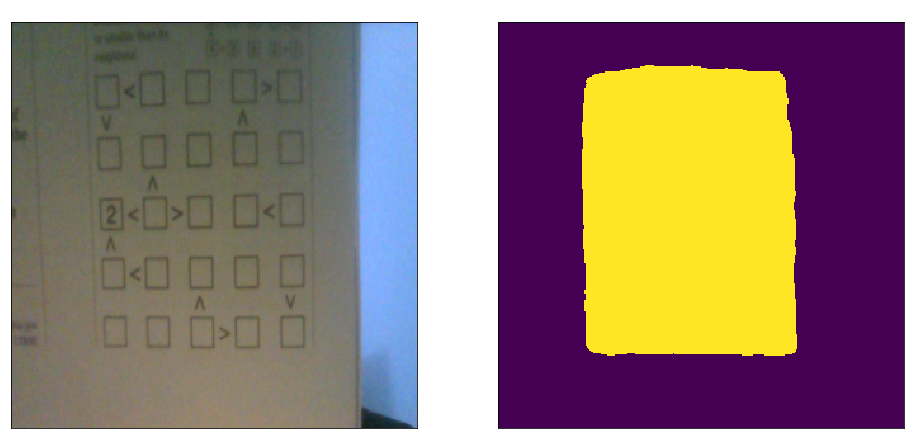

In [37]:
visualize(
    actual = image_vis,
    pred = pr_mask
)

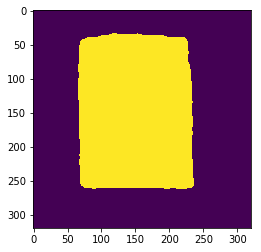

In [38]:
pr_mask_full = cv2.resize(pr_mask, (image_vis.shape[1], image_vis.shape[0]))
plt.imshow(pr_mask_full)

In [70]:
pr_mask_full.shape[::-1]

(320, 320)

In [39]:
def mask_input(input_image, mask):
    mask = np.dstack([mask] * 3)
    mask = (mask == 1)
    #input_image = cv2.resize(input_image, (480, 320))
    return np.where(mask, input_image, 0)

In [40]:
masked_img = mask_input(image_vis, pr_mask_full)

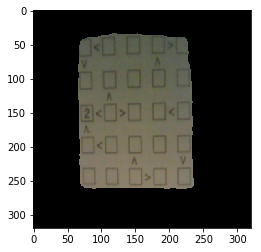

In [41]:
plt.imshow(masked_img)

In [42]:
imgray = cv2.cvtColor(masked_img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,0,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [43]:
# get largest contour, generate bounding rectangle of minimum area - including rotation
c = max(contours, key = cv2.contourArea)
rect = cv2.minAreaRect(c)
box = cv2.boxPoints(rect)
box = np.int0(box)

In [44]:
# get largest contour - no rotation
x,y,w,h = cv2.boundingRect(c)

In [45]:
cropped = masked_img[y:y+h, x:x+w]

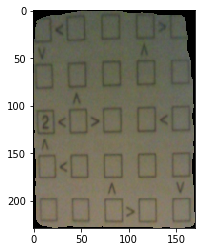

In [46]:
plt.imshow(cropped)

In [47]:
full_cropped = image_vis[y:y+h, x:x+w]

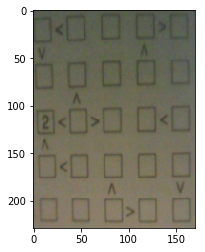

In [48]:
plt.imshow(full_cropped)

In [64]:
from img_process import process_image

In [68]:
process_image(full_cropped, debug=True)

100%|██████████████████████████████████████| 142/142 [00:00<00:00, 1300.35it/s]

Accepted contours 25
